In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline

# Comparing Functions
### Functionally Greater Than
$ 2n > n $

Here, $2n$ is functionally greater than $n$. You can determine it with any of the following methods.
- Subtracting the two and assessing the new function: $2n - n$ is asymptotically positive, meaning $2n$ is functionally greater
- Compare the first derivatives of the two functions: $\frac{d}{dn}2n > \frac{d}{dn}n = 2 > 1$ which holds true, so 2n is functionally greater
- Take the limit of the larger function divided by the smaller. If it goes to infinity or some constant $c$ such that $c>1$, then the top function is functionally greater. $ \lim_{x\to\infty} \frac{2n}{n} = 2$ since $c = 2 > 1$ holds true, 2n is functionally greater

### Asymptotically Greater Than
$ n\log n > n $

This means a function grows faster than another. If you observe the function at large values, it will be greater than the other. Asymptotically greater than implies functionally greater than as well. In asymptotic notation, the above statement is equivalent to $ n = o(n\log n) $
1. Determine $ n = O(n\log n) $ holds true
2. Take the limit of the larger function divided by the smaller. If it goes to infinity, then the top function is asymptotically greater: $ \lim_{x\to\infty} \frac{n\log n}{n} = \infty$, so $n\log n$ is asymptotically greater.
- Note: you can also take the limit of the smaller function divided by the larger. If it goes to 0, then the bottom function is asymptotically greater: $ \lim_{x\to\infty} \frac{n}{n\log n} = 0$, so $n\log n$ is asymptotically greater


### Polynomially Greater Than
$ n^2 > n $

This means that the function is still larger than the other if the smaller function is multiplied by $n$ to the power of some arbitrarily small epsilon. This makes the equation: $n^2 > n * n^\epsilon$
There is a value of epsilon such that this holds true: $\epsilon = 0.1$

Polynomially greater than implies both asymptotically greater than and functionally greater than.

- Take the limit towards infinity of the smaller function times $n^\epsilon$ divided by the larger function. If this equals 0, then the bottom function is polynomially greater: $ \lim_{x\to\infty} \frac{n * n^\epsilon}{n^2} = 0$


# Asymptotic Notation
## Big O

$f(n) = O(g(n))$

$f(n)$ is Big O of $g(n)$ if there exists two constants $n_o, c$ such that $f(n) \leq c*g(n) \quad \forall n\geq n_o$

This means for all values of $n$ past a certain point ($n_o$), $f(n)$ will be smaller than $c*g(n)$ where c is just a constant. In simple terms, $g(n)$ offers an upper bound on what the values of $f(n)$ can be

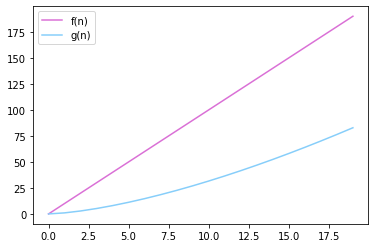

In [2]:
x_points = [x for x in range(500)]
y_1 = list(map(lambda x: 10*x, x_points))
y_2 = list(map(lambda x: x**1.5, x_points))

plt.plot(x_points[:20], y_1[:20], label = 'f(n)', color = 'orchid')
plt.plot(x_points[:20], y_2[:20], label = 'g(n)', color = 'lightskyblue')
plt.legend(loc='upper left')
plt.show()

Looking at the above graph, it may seem as though $f(n)$ is larger than $g(n)$, however, notice that the values of n are very small, so we cannot assume the behavior of the two functions as they approach infinity.

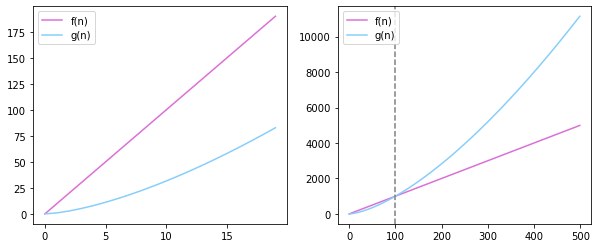

In [3]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (10,4)
f, axis = plt.subplots(1, 2)

axis[0].plot(x_points[:20], y_1[:20], label = 'f(n)', color = 'orchid')
axis[0].plot(x_points[:20], y_2[:20], label = 'g(n)', color = 'lightskyblue')
axis[0].legend(loc='upper left')

axis[1].plot(x_points, y_1, label = 'f(n)', color = 'orchid')
axis[1].plot(x_points, y_2, label = 'g(n)', color = 'lightskyblue')
axis[1].legend(loc='upper left')

y_intersect = [i for i, v in enumerate(y_1[1:]) if v in y_2[1:]]
n_o = x_points[y_intersect[0]]

axis[1].axvline(n_o, color='gray', linestyle='--')

plt.show()

The graph on the right shows the same two equations as the graph on the left, but it covers many more points. Now it can be seen that at $n_o = 120$, $g(n)$ overtakes $f(n)$ and continues to be larger as both approach infinity. Looking at the actual values of the functions (given below), it can be seen that $g(n)$ is polynomially greater than $f(n)$, so it makes sense that $f(n) = O(g(n))$ as well. We can also take the values of $n_o = 120$ and $c = 1$ to prove it with the formal definition.

$f(n) = 10n$

$g(n) = n^{1.5}$

## Big Omega

$f(n) = \Omega(g(n))$

$f(n)$ is Big Omega of $g(n)$ if there exists two constants $n_o, c$ such that $f(n) \geq c*g(n) \quad \forall n\geq n_o$

This means for all values of $n$ past a certain point ($n_o$), $f(n)$ will be larger than $c*g(n)$ where c is just a constant. In simple terms, $g(n)$ offers lower bound on what the values of $f(n)$ can be. This is the opposite of Big O.

$f(n) = \Omega(g(n))$ implies $g(n) = O(f(n))$

## Theta

$f(n) = \theta(g(n))$ if and only if $f(n) = O(g(n))$ AND $f(n) = \Omega(g(n))$

$f(n)$ is Theta of $g(n)$ if they are asymptotically equivalent. This means that they can be proven to be both Big O and Big Omega of each other. It is more specific than Big O or Big Omega individually. For example, knowing $f(n) = O(n^{100})$ is not useful since $n^{100}$ is so large it doesn't really tell us anything about $f(n)$. It could be $n^2$ or $n^{50}$. If you know $f(n) = \theta(n^{3})$, you know that $n^3$ provides both and upper and lower bound for $f(n)$

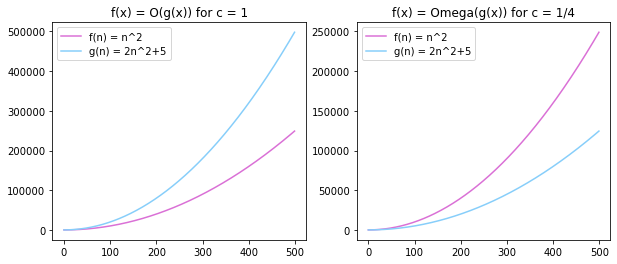

In [4]:
y_1 = list(map(lambda x: x**2, x_points))
y_2 = list(map(lambda x: 2*x**2+5, x_points))

plt.rcParams["figure.figsize"] = (10,4)
f, axis = plt.subplots(1, 2)

axis[0].set_title("f(x) = O(g(x)) for c = 1")
axis[0].plot(x_points, y_1, label = 'f(n) = n^2', color = 'orchid')
axis[0].plot(x_points, y_2, label = 'g(n) = 2n^2+5', color = 'lightskyblue')
axis[0].legend(loc='upper left')

axis[1].set_title("f(x) = Omega(g(x)) for c = 1/4")
axis[1].plot(x_points, y_1, label = 'f(n) = n^2', color = 'orchid')
axis[1].plot(x_points, list(map(lambda x: x*.25, y_2)), label = 'g(n) = 2n^2+5', color = 'lightskyblue')
axis[1].legend(loc='upper left')

plt.show()

The above graphs show how $f(n) = O(g(n))$ AND $f(n) = \Omega(g(n))$ for different values of $c$. It can be concluded that $f(n) = \theta(g(n))$


## Little O

$f(n) = o(g(n))$

$f(n)$ is Little O of $g(n)$ if $f(n)$ is asymptotically smaller than $g(n)$. This means it provides a tigher bound than Big O. The method to determine if it is true is the same as previously discussed in the asymptotically greater than section and is listed below again.

1. Determine $f(n) = O(g(n))$ holds true
2. Take the limit of the larger function $g(n)$ divided by the smaller function $f(n)$. If it goes to infinity, then $g(n)$ is asymptotically greater: $ \lim_{x\to\infty} \frac{g(n)}{f(n)} = \infty$
- Note: you can also take the limit of the smaller function $f(n)$ divided by the larger function $g(n)$. If it goes to 0, then $g(n)$ is asymptotically greater: $ \lim_{x\to\infty} \frac{f(n)}{g(n)} = 0$

## Little Omega

$f(n) = \omega(g(n))$

$f(n)$ is Little Omega of $g(n)$ if $f(n)$ is asymptotically larger than $g(n)$. This means it provides a tigher bound than Big Omega. This is the opposite of Little O.

$f(n) = \omega(g(n))$ implies $g(n) = o(f(n))$

1. Determine $f(n) = \Omega(g(n))$ holds true
2. Take the limit of the larger function $f(n)$ divided by the smaller function $g(n)$. If it goes to infinity, then $g(n)$ is asymptotically smaller: $ \lim_{x\to\infty} \frac{f(n)}{g(n)} = \infty$
- Note: you can also take the limit of the smaller function $g(n)$ divided by the larger function $f(n)$. If it goes to 0, then $g(n)$ is asymptotically smaller: $ \lim_{x\to\infty} \frac{g(n)}{f(n)} = 0$

# General Function Growth Rates

Listed in Increased Growth Rate

$O(1)$ Constant

$O(\log n)$ Logarithmic

$O(n)$ Linear

$O(n^i)$ for some constant $i>1$, Polynomial

$O(a^n)$ for some constant $a>1$, Exponential

$O(n!)$ Factorial